In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

plt.rcParams['figure.figsize']=[14,4]

df = pd.read_csv('/content/book_sales.csv')

In [149]:
df.head()

,Date,Paperback,Hardcover
0,2000-04-01,199,139
1,2000-04-02,172,128
2,2000-04-03,111,172
3,2000-04-04,209,139
4,2000-04-05,161,191


In [150]:
df.drop(['Paperback'],axis=1,inplace=True)

In [151]:
df.head()

,Date,Hardcover
0,2000-04-01,139
1,2000-04-02,128
2,2000-04-03,172
3,2000-04-04,139
4,2000-04-05,191


In [152]:
df = df.set_index('Date')

In [153]:
df['Time']=np.arange(len(df.index))

In [154]:
df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


<Axes: xlabel='Time', ylabel='Hardcover'>

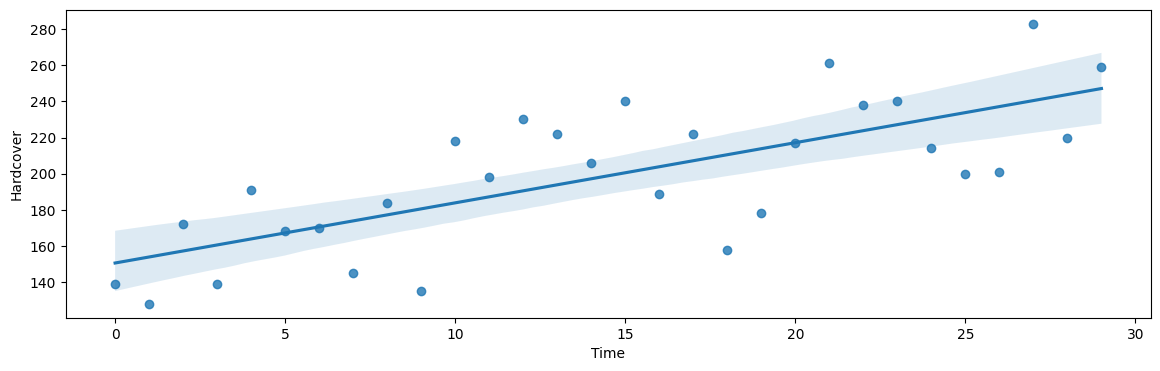

In [155]:
sns.regplot(x='Time',y='Hardcover',data=df)

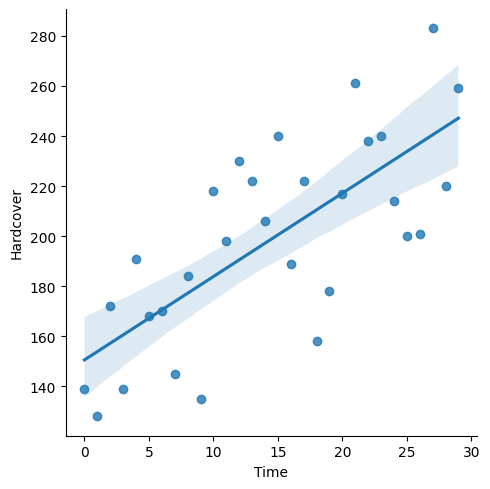

In [156]:
sns.lmplot(x='Time',y='Hardcover',data=df)

In [157]:
df['lag_1']=df['Hardcover'].shift(1)
df['lag_2']=df['Hardcover'].shift(2)


In [158]:
df.head()

,Hardcover,Time,lag_1,lag_2
Date,,,,
2000-04-01,139,0,NaN,NaN
2000-04-02,128,1,139.0,NaN
2000-04-03,172,2,128.0,139.0
2000-04-04,139,3,172.0,128.0
2000-04-05,191,4,139.0,172.0


In [159]:
df=df.fillna(0)

In [160]:
df.head()

,Hardcover,Time,lag_1,lag_2
Date,,,,
2000-04-01,139,0,0.0,0.0
2000-04-02,128,1,139.0,0.0
2000-04-03,172,2,128.0,139.0
2000-04-04,139,3,172.0,128.0
2000-04-05,191,4,139.0,172.0


In [161]:
df_train=df.iloc[:21]
df_test=df.iloc[22:]

In [162]:
df_train=df.reset_index()
x_train = df_train.loc[:,['Time','lag_1','lag_2']]
y_train = df_train.loc[:,['Hardcover']]
x_test = df_test.loc[:,['Time','lag_1','lag_2']]
y_test = df_test.loc[:,['Hardcover']]


In [163]:
scaler1 = StandardScaler()
x_train = scaler1.fit_transform(x_train)
x_test = scaler1.transform(x_test)
scaler2 = StandardScaler()
y_train = scaler1.fit_transform(y_train)
y_test = scaler1.transform(y_test)


In [166]:
lin_reg =LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [167]:
lin_reg.coef_

array([[ 0.54814658, -0.08344781,  0.3251223 ]])

In [168]:
lin_reg.intercept_

array([-2.37025628e-16])

In [173]:
y_pred=lin_reg.predict(x_test)

In [174]:
y_pred

array([[0.5407839 ],
       [0.87270235],
       [0.81175126],
       [0.92741973],
       [0.87640772],
       [0.86443784],
       [0.80116445],
       [1.39742783]])

In [177]:
mean_squared_error(y_pred,y_test)

0.4458004043856952

In [178]:
lin_reg.score(x_test,y_test)

0.04816766416908269